# TUTORIAL 3 : Evolute of curves

The evolute of a curve is by definition the set of its centers of curvatures. The goal of this lab session is to define a generic function that computes the evolute of any parameterized curve. 

# Definition of the evolute:
Let $\gamma:[a,b]\to \mathbb{R}^d$ be a curve ($d=2$ or $d=3$). The center of curvature is defined by
$$
C(t) = \gamma(t)+ \frac{1}{\kappa(t)}N(t),
$$
where $\kappa(t)$ is the curvature and $N(t)$ is the principal normal. The evolute of the curve $\gamma$ is the curve $t\mapsto C(t)$.
### case d=2: curvature and principal normal
When $d=2$, $T(t)=\gamma'(t)/\|\gamma'(t)\|$ is the tangent vector, $N(t)$ a rotation of $\pi/2$ of $T(t)$ and 
$$
\kappa(t) = \frac{det(\gamma'(t), \gamma''(t))}{\|\gamma'(t)\|^3}
$$

### d=3: curvature and principal normal
The curvature $\kappa(t)$ of the curve at the point $\gamma(t)$ is given by
$$
\kappa(t) = \frac{\|\gamma'(t)\wedge \gamma''(t)\|}{\|\gamma'(t)\|^3}
$$
When the curve is arc length parameterized, the principal normal to the curve at the point $\gamma(s)$ is given by 
$$
N(s) = T'(s), 
$$
where $T(s)=\gamma'(s)$ (see also exercise 8).
## PART I. 
We assume in the following that we have a parametrized curve $f:[a,b]\to\mathbb{R}^d$ which is only known through a discretization $(t,f)$ where $$\textit{t = np.linspace(0,1,n)}\quad f=(f(t_0),\cdots,f(t_{n-1})).$$
$f$ is therefore of size $d \times n$.

## 1) Discrete derivative
Define a function that calculate an approximation of the derivative of $f$. The output has the same size than $t$ and $f$. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#----------------------
# discrete derivative
def derivative(t, f):
    if f.ndim == 1:
        f = f.reshape(1,-1) 
    n = len(t)
    h = t[1] - t[0]
    
    deriv_f = np.zeros_like(f)
    
    deriv_f[:, 0] = (f[:, 1] - f[:, 0]) / h
    
    for i in range(1, n-1):
        deriv_f[:, i] = (f[:, i+1] - f[:, i-1]) / (2*h) #centered order 2 approximation
    
    deriv_f[:, -1] = (f[:, -1] - f[:, -2]) / h
    
    return deriv_f

## 2) Discrete normal vector
The goal is to build the function that outputs for every $t_i$ the unit normal $N(t_i)$.

In [2]:
#----------------------
# discrete normal vector
def normal_vector(t, f):

    if f.ndim == 1:
        f = f.reshape(1, -1)
    d, n = f.shape
    df = derivative(t, f)
    
    if d == 2:
        tangent_norms = np.sqrt(df[0]**2 + df[1]**2)
        tangent_norms = np.where(tangent_norms == 0, 1e-10, tangent_norms)
        T = df / tangent_norms
        
        normal_f = np.array([-T[1], T[0]])
        
    elif d == 3:   
        tangent_norms = np.sqrt(np.sum(df**2, axis=0))
        tangent_norms = np.where(tangent_norms == 0, 1e-10, tangent_norms)
        T = df / tangent_norms
        
        normal_f = derivative(t, T)
        
        normal_norms = np.sqrt(np.sum(normal_f**2, axis=0))
        normal_norms = np.where(normal_norms == 0, 1e-10, normal_norms)
        normal_f = normal_f / normal_norms
        
    
    return normal_f

## 3) Curvature function
The goal is to build the function that outputs for every $t_i$ the curvature $k(t_i)$.

## 4) Evolute 
Define the evolute, namely the set of centers of curvatures. 

In [4]:
#----------------------
# discrete evolute
def evolute(t, f):
    
    if f.ndim == 1:
        f = f.reshape(1, -1)
    
    kappa = curvature(t, f)  
    kappa= np.where(kappa == 0, 1e-10, kappa) 
    N = normal_vector(t, f) 
    evolute_f = f + (1.0 / kappa) * N
    
    return evolute_f

## PART II. 
## 1) Evolute of the catenary
Plot the evolute of the catenary 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^2\\ 
&t &\mapsto & (t,\cosh t).
\end{array}
$$

Text(0.5, 1.0, 'Catenary and its Evolute')

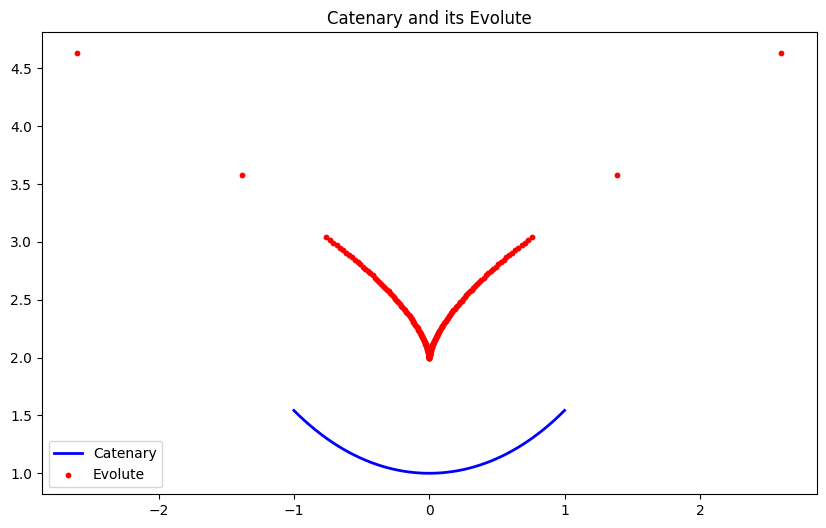

In [5]:

t_cat = np.linspace(-1, 1, 200)
f_catenary = np.array([t_cat, np.cosh(t_cat)])

evolute_catenary = evolute(t_cat, f_catenary)

plt.figure(figsize=(10, 6))
plt.plot(f_catenary[0], f_catenary[1], 'b-', linewidth=2, label='Catenary')
plt.scatter(evolute_catenary[0], evolute_catenary[1], color='r', marker='o', s=10, label='Evolute')
plt.legend()
plt.title('Catenary and its Evolute')

## 2) Evolute of an ellipse. 

Text(0.5, 1.0, 'Ellipse and its Evolute')

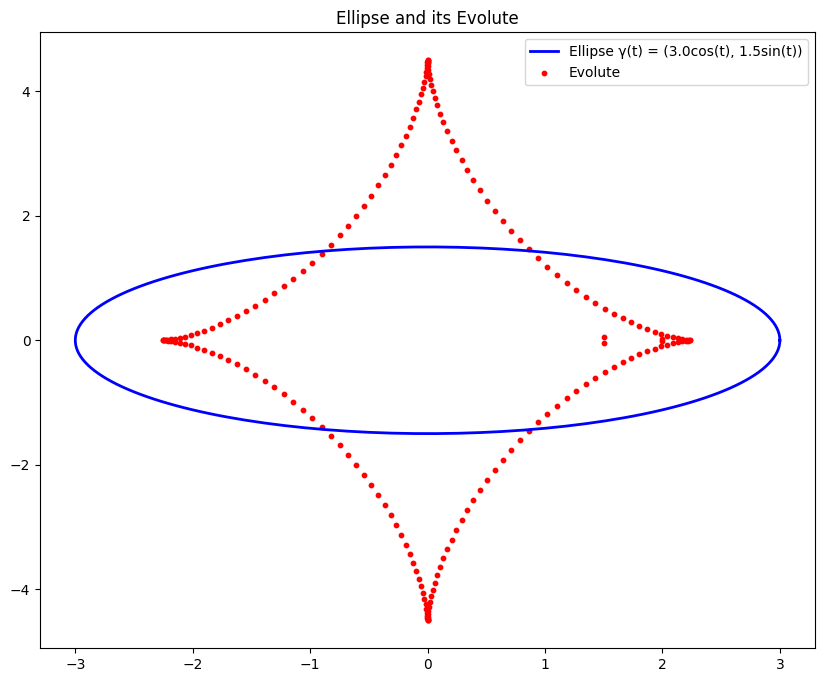

In [6]:

a_ellipse = 3.0  
b_ellipse = 1.5  
t_ellipse = np.linspace(0, 2*np.pi, 200)

f_ellipse = np.array([a_ellipse*np.cos(t_ellipse), b_ellipse*np.sin(t_ellipse)])

evolute_ellipse = evolute(t_ellipse, f_ellipse)

plt.figure(figsize=(10, 8))
plt.plot(f_ellipse[0], f_ellipse[1], 'b-', linewidth=2, label=f'Ellipse γ(t) = ({a_ellipse}cos(t), {b_ellipse}sin(t))')
plt.scatter(evolute_ellipse[0], evolute_ellipse[1], color='r', s=10, label='Evolute')
plt.legend()
plt.title('Ellipse and its Evolute')



## 3) Evolute of the helicoid
Plot the evolute of the helicoid 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^3\\ 
&t &\mapsto & (R\cos t, R \sin t, at).
\end{array}
$$

Text(0.5, 0.92, '3D Helix and its Evolute')

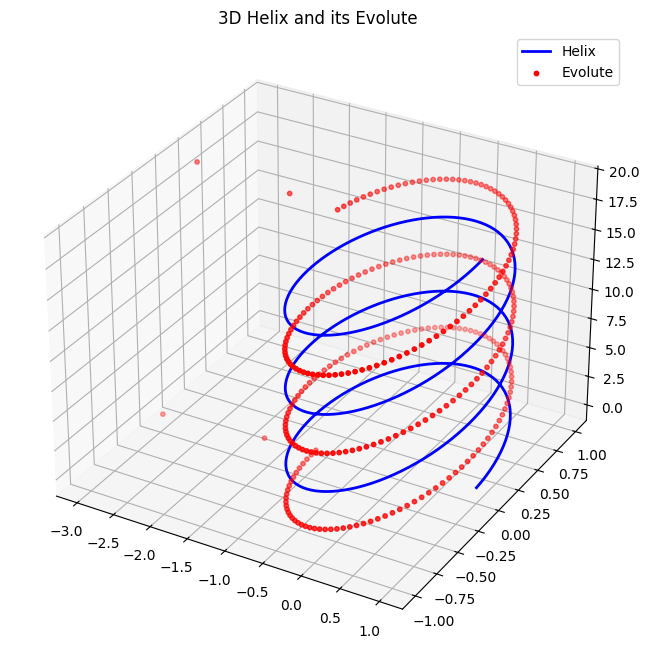

In [7]:
R = 1.0
a = 1.0
t_helix = np.linspace(0, 6*np.pi, 300)

f_helix = np.array([R*np.cos(t_helix), R*np.sin(t_helix), a*t_helix])

evolute_helix = evolute(t_helix, f_helix)

ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.plot(f_helix[0], f_helix[1], f_helix[2], 'b-', linewidth=2, label='Helix')
ax.scatter(evolute_helix[0], evolute_helix[1], evolute_helix[2], color='r', s=10, label='Evolute')
ax.legend()
ax.set_title('3D Helix and its Evolute')